In [1]:
# importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
# reading the data file
df = pd.read_csv('iris.csv')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [3]:
# seeing the different columns from the dataset
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [4]:
# getting the information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
# getting the mean and standard deviation for various columns
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
# checking any null value is there in the dataset
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

## Data Visualization

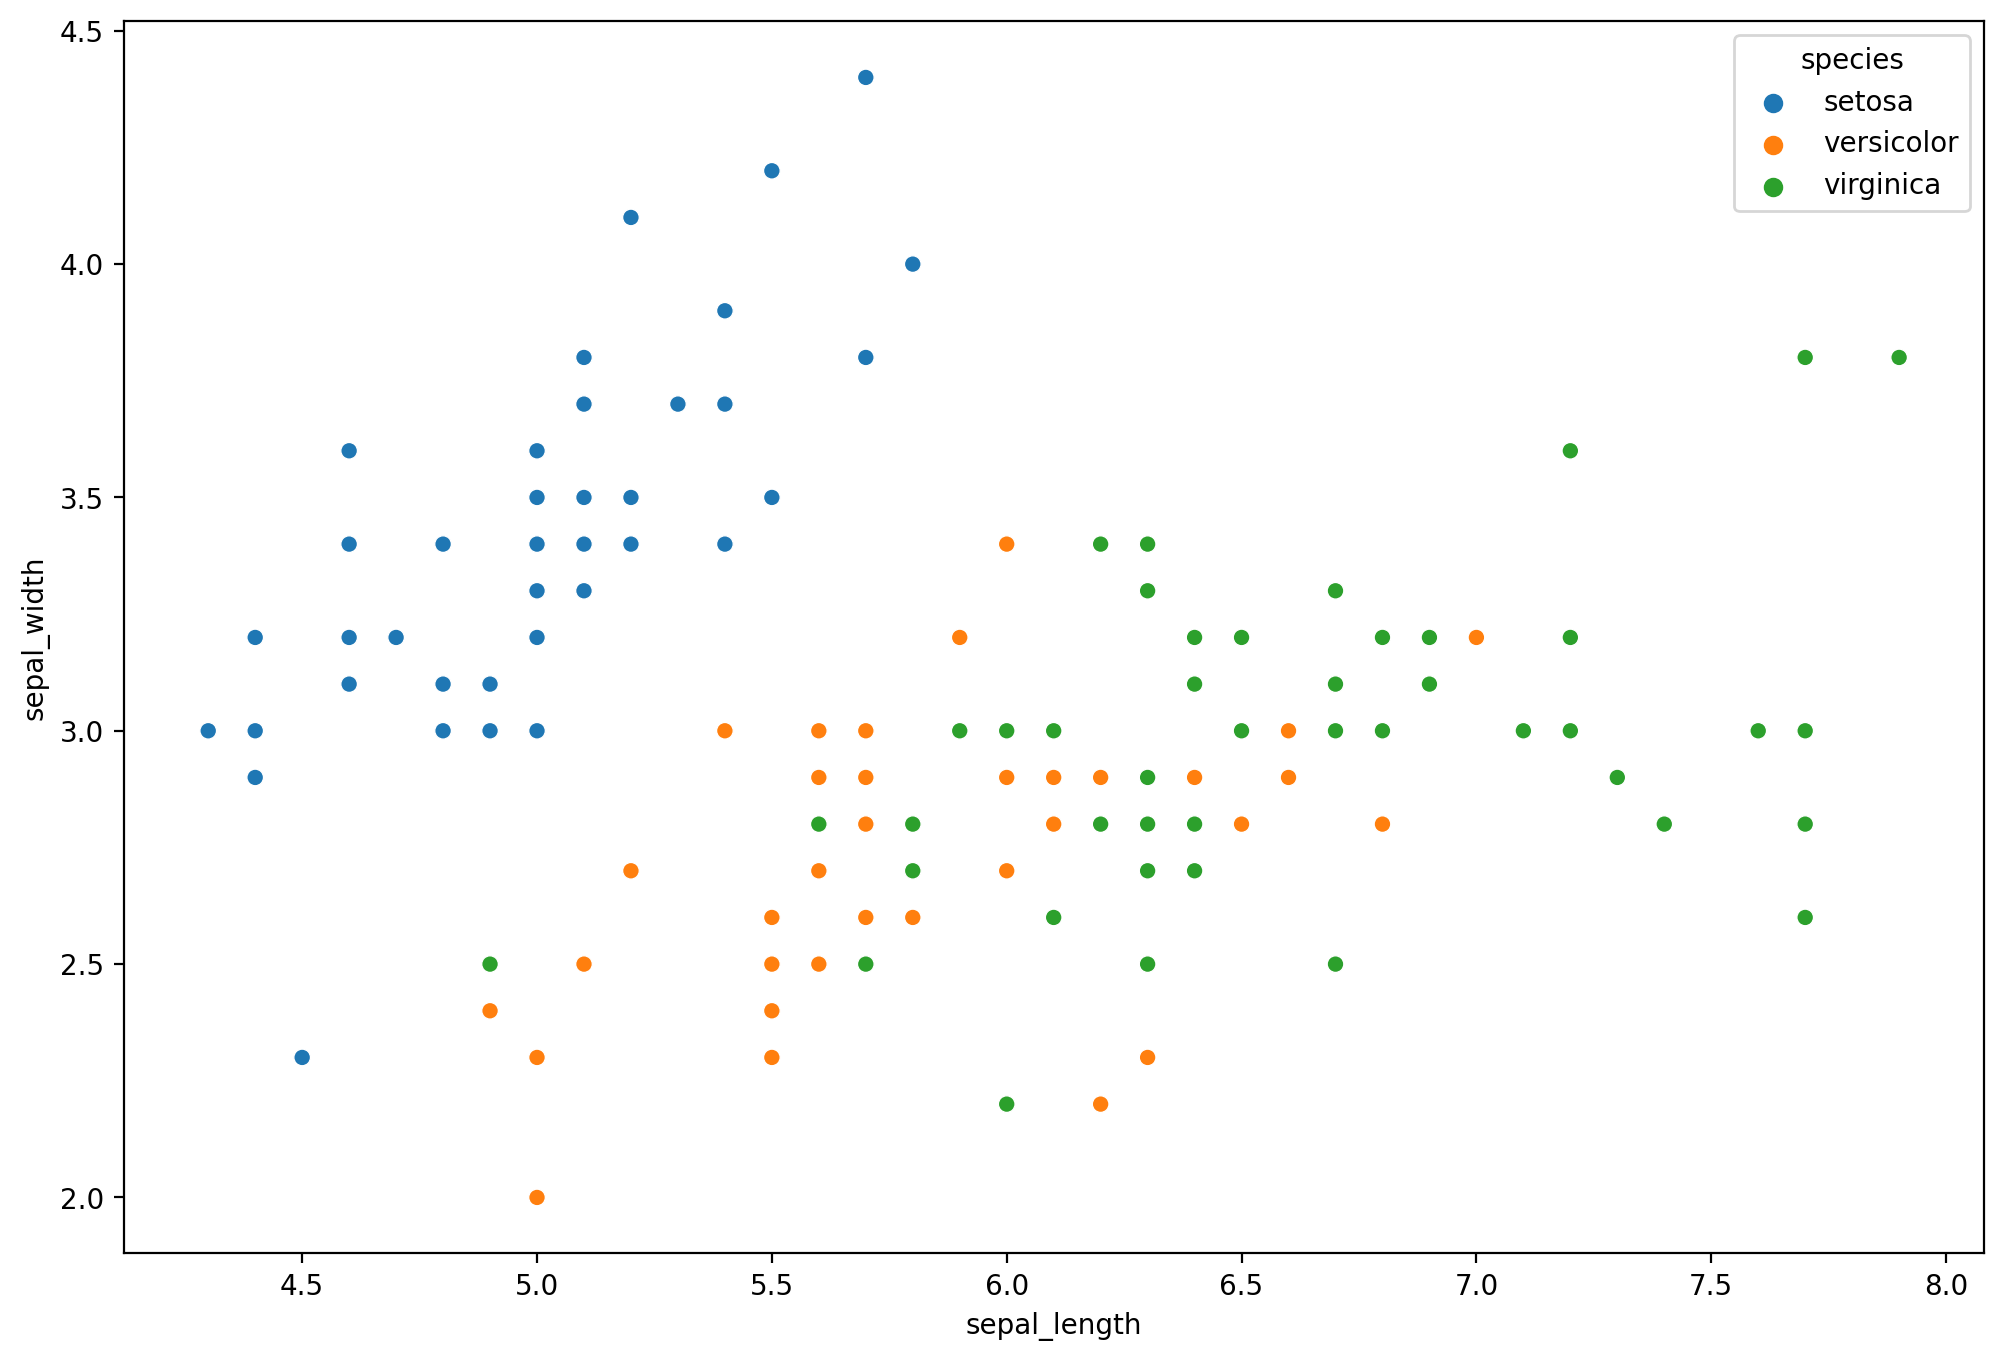

In [7]:
plt.figure(figsize=(12,8),dpi = 200)
sns.scatterplot(data=df,x='sepal_length',y='sepal_width',hue='species');
# creating a scatterplot to see the relation between sepal length and sepal width of the flower

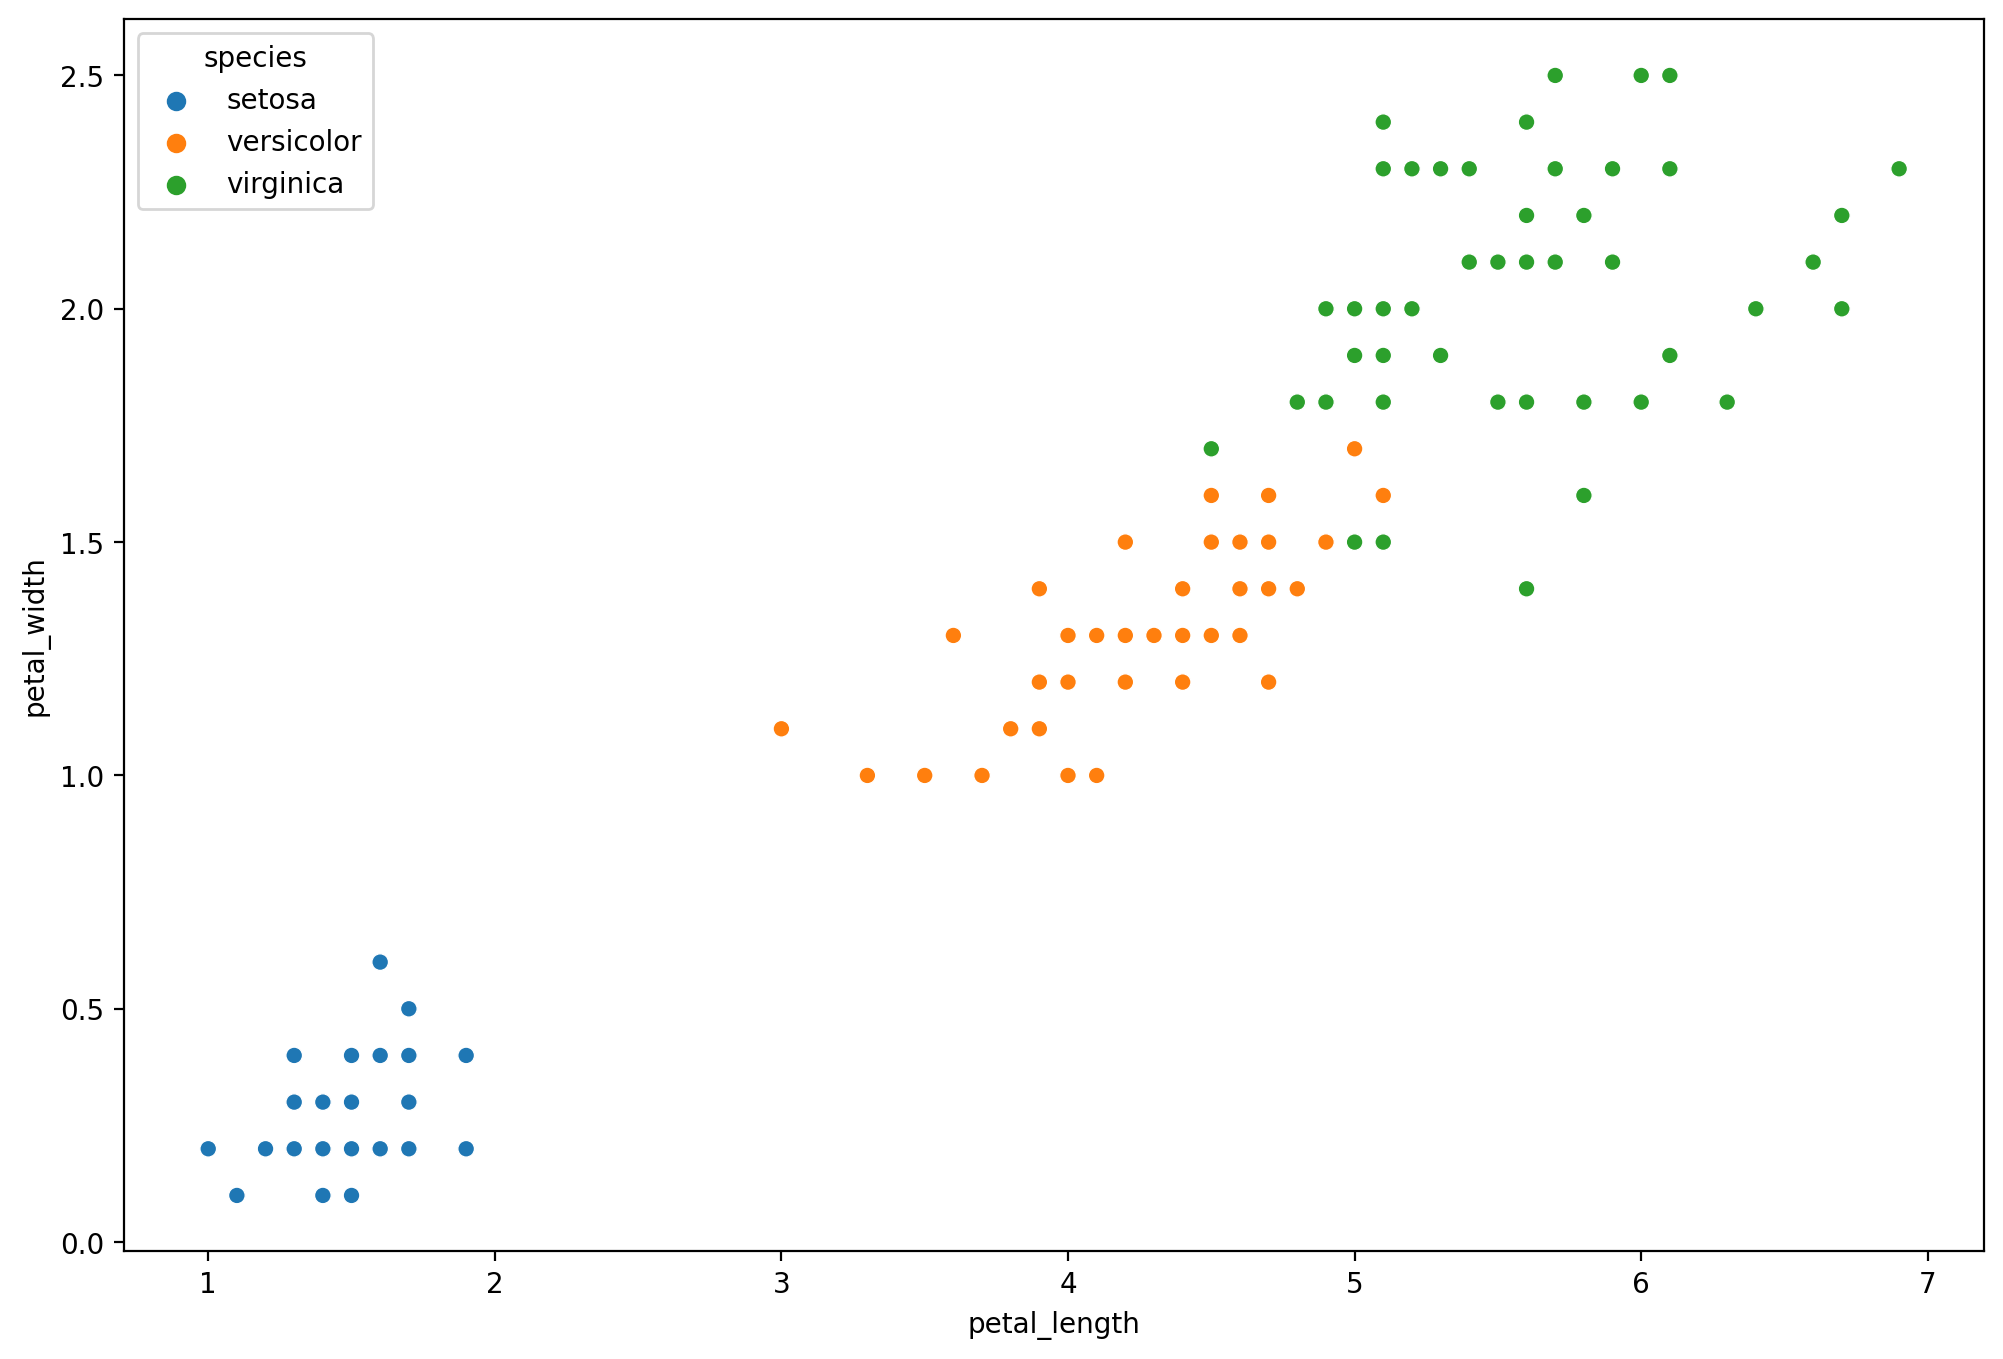

In [8]:
plt.figure(figsize=(12,8),dpi = 200)
sns.scatterplot(data=df,x='petal_length',y='petal_width',hue='species');
#creating the scatterplot to visualize the realtion between petal length and petal width

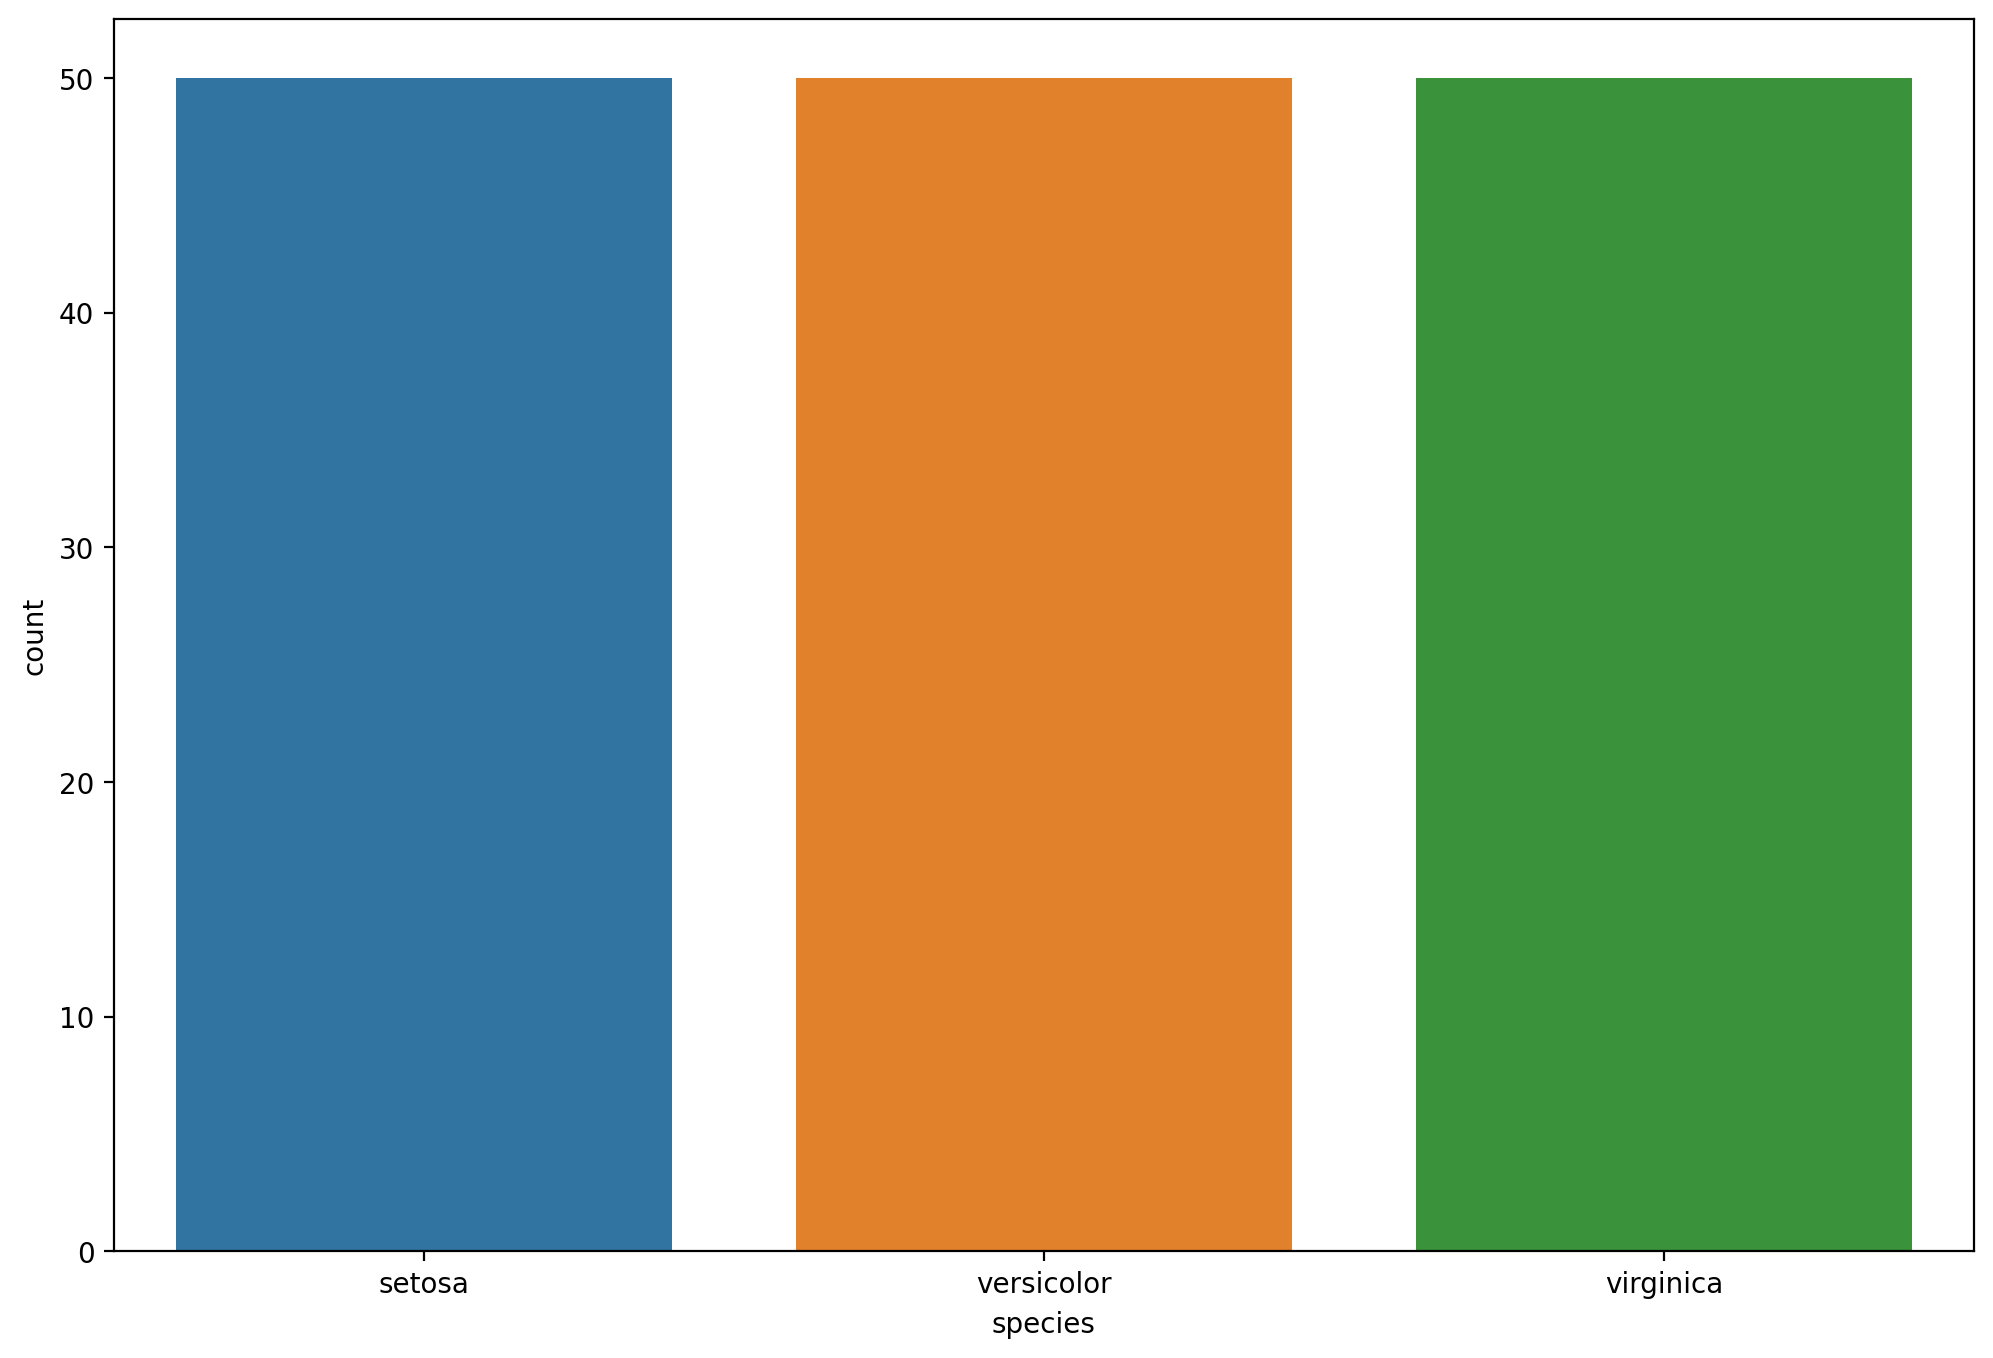

In [9]:
# creating a countplot to see the distribution of different species
plt.figure(figsize=(12,8),dpi=200)
sns.countplot(data=df,x='species');


In [10]:
# there is a equal distribution of the three species in the dataset

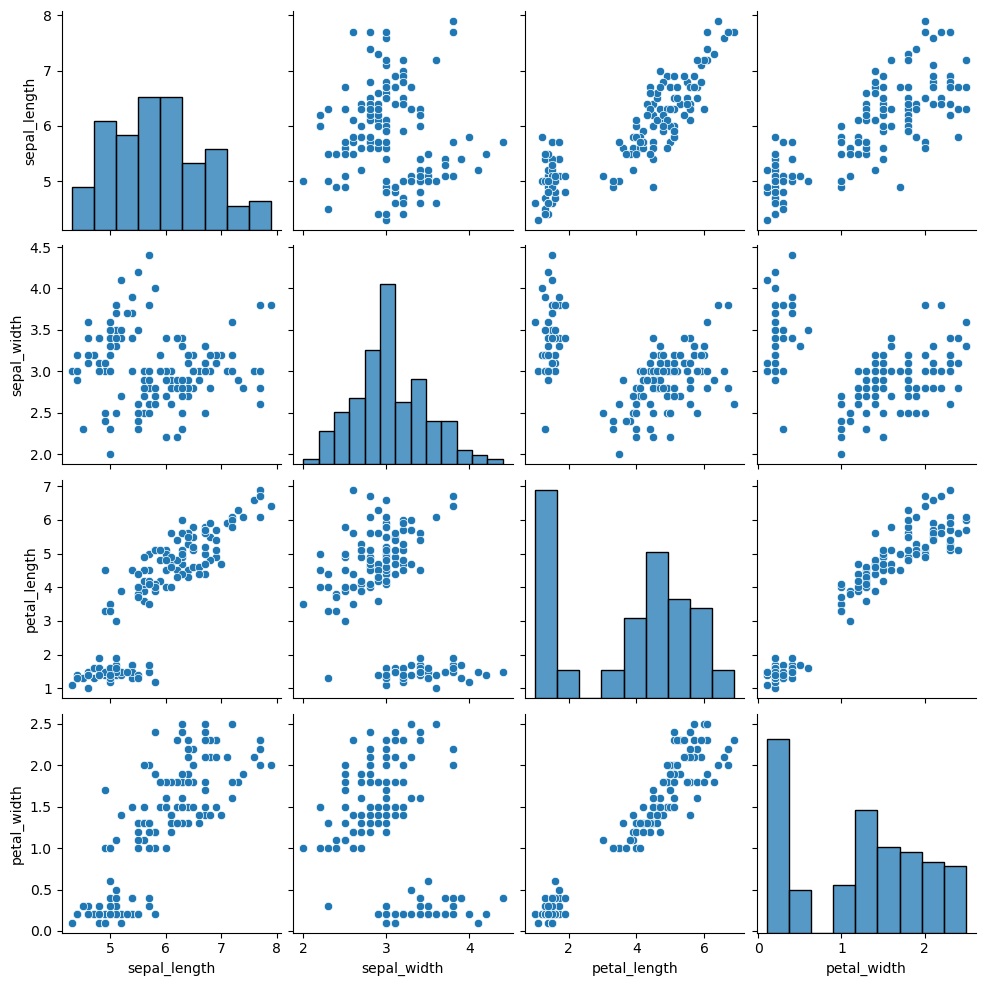

In [11]:
# Creating a pairplot to visulaize overall the features
sns.pairplot(data=df)

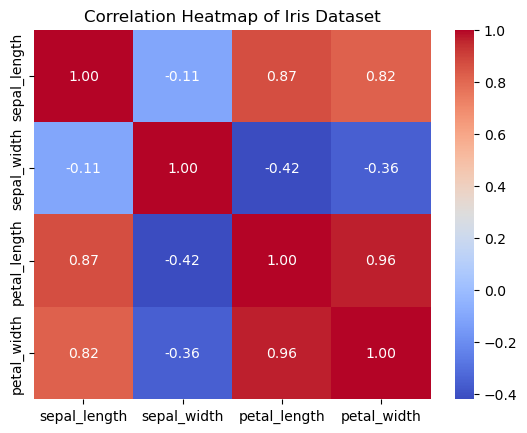

In [12]:
# Exclude non-numeric columns
numeric_iris = df.select_dtypes(include=['float64', 'int64'])

# Create a heatmap of the correlation matrix
corr = numeric_iris.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Iris Dataset')
plt.show()

## Splitting the dataset and standardizing the data

In [13]:
X = df.drop('species',axis = 1)
y = df['species']
# assigning the features to X label and Y label

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.25, random_state=101)

In [16]:
# importing the standard scaler to standardize the values
from sklearn.preprocessing import StandardScaler
# iniating the scaler instance 
scaler = StandardScaler()

In [17]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
# importing library for logistic Regression
from sklearn.linear_model import LogisticRegression
# importing library for GridSearchCV
# getting the best hyperparameter for logisticRegression
from sklearn.model_selection import GridSearchCV

In [19]:
log_model = LogisticRegression(solver='saga',
                    multi_class='ovr',max_iter=5000)


In [20]:
# creating list of values and using GridSearchCV to choose the best one
pen = ['l1','l2','elasticnet']
l1_ratio = np.linspace(0,1,20)
c = np.logspace(0,10,20)
param_grid = {'penalty':pen,'l1_ratio':l1_ratio,
             'C':c}

grid_model = GridSearchCV(log_model,param_grid=param_grid)

In [21]:
# fitting trained data to grid_model
grid_model.fit(X_train,y_train)

GridSearchCV(estimator=LogisticRegression(max_iter=5000, multi_class='ovr',
                                          solver='saga'),
             param_grid={'C': array([1.00000000e+00, 3.35981829e+00, 1.12883789e+01, 3.79269019e+01,
       1.27427499e+02, 4.28133240e+02, 1.43844989e+03, 4.83293024e+03,
       1.62377674e+04, 5.45559478e+04, 1.83298071e+05, 6.15848211e+05,
       2.06913808e+06, 6.95192796e+06, 2.33572147e+07, 7.84759970e+07,
       2.63665090e+08, 8.85866790e+08, 2.97635144e+09, 1.00000000e+10]),
                         'l1_ratio': array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ]),
                         'penalty': ['l1', 'l2', 'elasticnet']})

In [22]:
# getting the best parameters
grid_model.best_params_

{'C': 11.28837891684689, 'l1_ratio': 0.0, 'penalty': 'l1'}

In [23]:
# predicting X_test
l_pred = grid_model.predict(X_test)

## Model Evaluation

In [24]:
# importing the metrics library from sklearn 
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [25]:
#getting the accuracy score
accuracy_score(y_test,l_pred)

0.9736842105263158

In [26]:
# printting the classification report
# which includes other parameters like f1-score, precision and recall
print(classification_report(y_test,l_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.94      1.00      0.97        17
   virginica       1.00      0.91      0.95        11

    accuracy                           0.97        38
   macro avg       0.98      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



In [27]:
# printing the confusion matrix
cm = confusion_matrix(y_test,l_pred)
cm

array([[10,  0,  0],
       [ 0, 17,  0],
       [ 0,  1, 10]], dtype=int64)

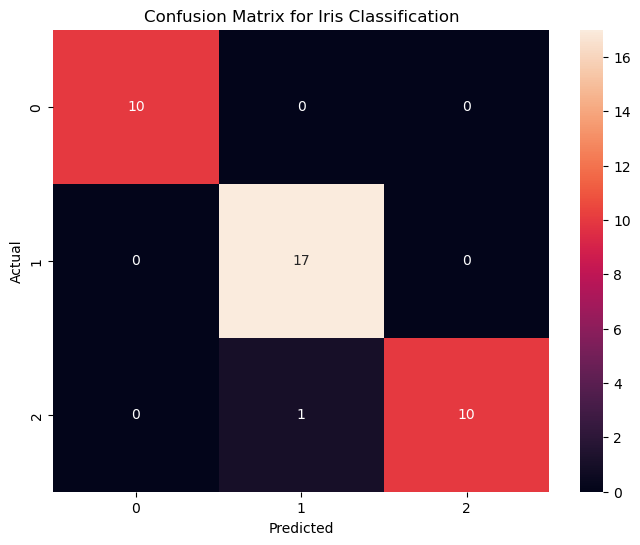

In [28]:
# displaying the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Iris Classification')
plt.show()

In [29]:
from sklearn.metrics import roc_curve, auc

def plot_multiclass_roc(clf, X_test, y_test, n_classes, figsize=(5,5)):
    y_score = clf.decision_function(X_test)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic example')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

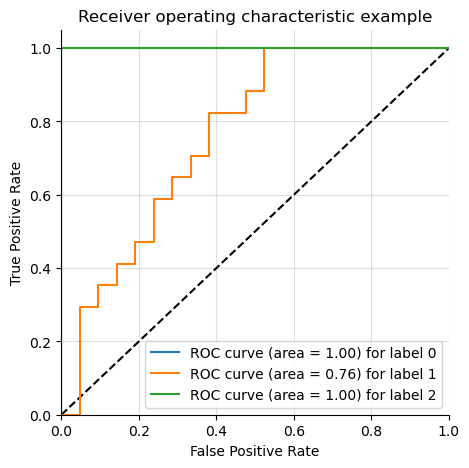

In [30]:
plot_multiclass_roc(grid_model,X_test,y_test,n_classes=3)

## Using KNN algorithm and Evaluating the Model


In [31]:
# importing the library for KNearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
k_model = KNeighborsClassifier()

In [32]:
# Getting different values for K neighbors
k_values = list(range(1,20))

In [33]:
# displaying the K neighbors
k_values

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [34]:
#choosing the parameter grid
param_grid = {'n_neighbors':k_values}

In [35]:
k_grid_model = GridSearchCV(k_model,param_grid=param_grid,
                           cv=5,scoring='accuracy')


In [36]:
k_grid_model.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy')

In [37]:
k_grid_model.best_params_
# getting the best number of neighbors for our model

{'n_neighbors': 14}

In [38]:
k_pred = k_grid_model.predict(X_test)
k_pred

array(['setosa', 'setosa', 'setosa', 'virginica', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'setosa', 'virginica', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'virginica', 'setosa', 'setosa',
       'virginica', 'versicolor', 'virginica', 'versicolor', 'virginica',
       'versicolor', 'versicolor', 'versicolor'], dtype=object)

In [39]:
# getting the accuracy, precision, recall and f1 score
print(classification_report(y_test,k_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.94      1.00      0.97        17
   virginica       1.00      0.91      0.95        11

    accuracy                           0.97        38
   macro avg       0.98      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



In [40]:
cm = confusion_matrix(y_test,k_pred)
cm 

array([[10,  0,  0],
       [ 0, 17,  0],
       [ 0,  1, 10]], dtype=int64)

# Decision Tree and Evaluating the model

In [41]:
# importing the library for using Decision tree 
from sklearn.tree import DecisionTreeClassifier
d_model = DecisionTreeClassifier()

In [42]:
# choosing the criterion we need
criterion = ['gini','entropy']
# choosing the max_depth for the tree
max_depth = list(range(2,22,2))

In [43]:
max_depth

[2, 4, 6, 8, 10, 12, 14, 16, 18, 20]

In [44]:
max_leaf_nodes = list(range(1,11))

In [45]:
param_grid = dict(criterion=criterion,
                      max_depth=max_depth,
                      max_leaf_nodes=max_leaf_nodes)

In [46]:
d_grid_model = GridSearchCV(d_model,param_grid,cv=5,
                           scoring='accuracy')

In [47]:
d_grid_model.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20],
                         'max_leaf_nodes': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='accuracy')

In [48]:
d_grid_model.best_params_
# getting the best hyperparameters for the model

{'criterion': 'gini', 'max_depth': 2, 'max_leaf_nodes': 4}

In [49]:
# predicitng the model 
d_pred = d_grid_model.predict(X_test)
d_pred

array(['setosa', 'setosa', 'setosa', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'setosa', 'virginica', 'virginica',
       'versicolor', 'versicolor', 'versicolor', 'setosa', 'versicolor',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'virginica', 'setosa', 'setosa',
       'virginica', 'versicolor', 'virginica', 'versicolor', 'virginica',
       'versicolor', 'versicolor', 'versicolor'], dtype=object)

In [50]:
#evaluating the model
print(classification_report(y_test,d_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.89      1.00      0.94        17
   virginica       1.00      0.82      0.90        11

    accuracy                           0.95        38
   macro avg       0.96      0.94      0.95        38
weighted avg       0.95      0.95      0.95        38



In [51]:
# printing the confusion matrix
cm = confusion_matrix(y_test,d_pred)

In [52]:
cm

array([[10,  0,  0],
       [ 0, 17,  0],
       [ 0,  2,  9]], dtype=int64)

In [53]:
d_model = DecisionTreeClassifier(criterion='gini',
                                max_depth=2,
                                max_leaf_nodes=3)
# creating decision tree model after finding the best hyperparameters

In [54]:
d_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2, max_leaf_nodes=3)

In [55]:
d_pred = d_model.predict(X_test)

In [56]:
# importing the library for visualizing the tree
from sklearn.tree import plot_tree

[Text(0.4, 0.8333333333333334, 'x[3] <= -0.557\ngini = 0.664\nsamples = 112\nvalue = [40, 33, 39]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(0.6, 0.5, 'x[3] <= 0.696\ngini = 0.497\nsamples = 72\nvalue = [0, 33, 39]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.157\nsamples = 35\nvalue = [0, 32, 3]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.053\nsamples = 37\nvalue = [0, 1, 36]')]

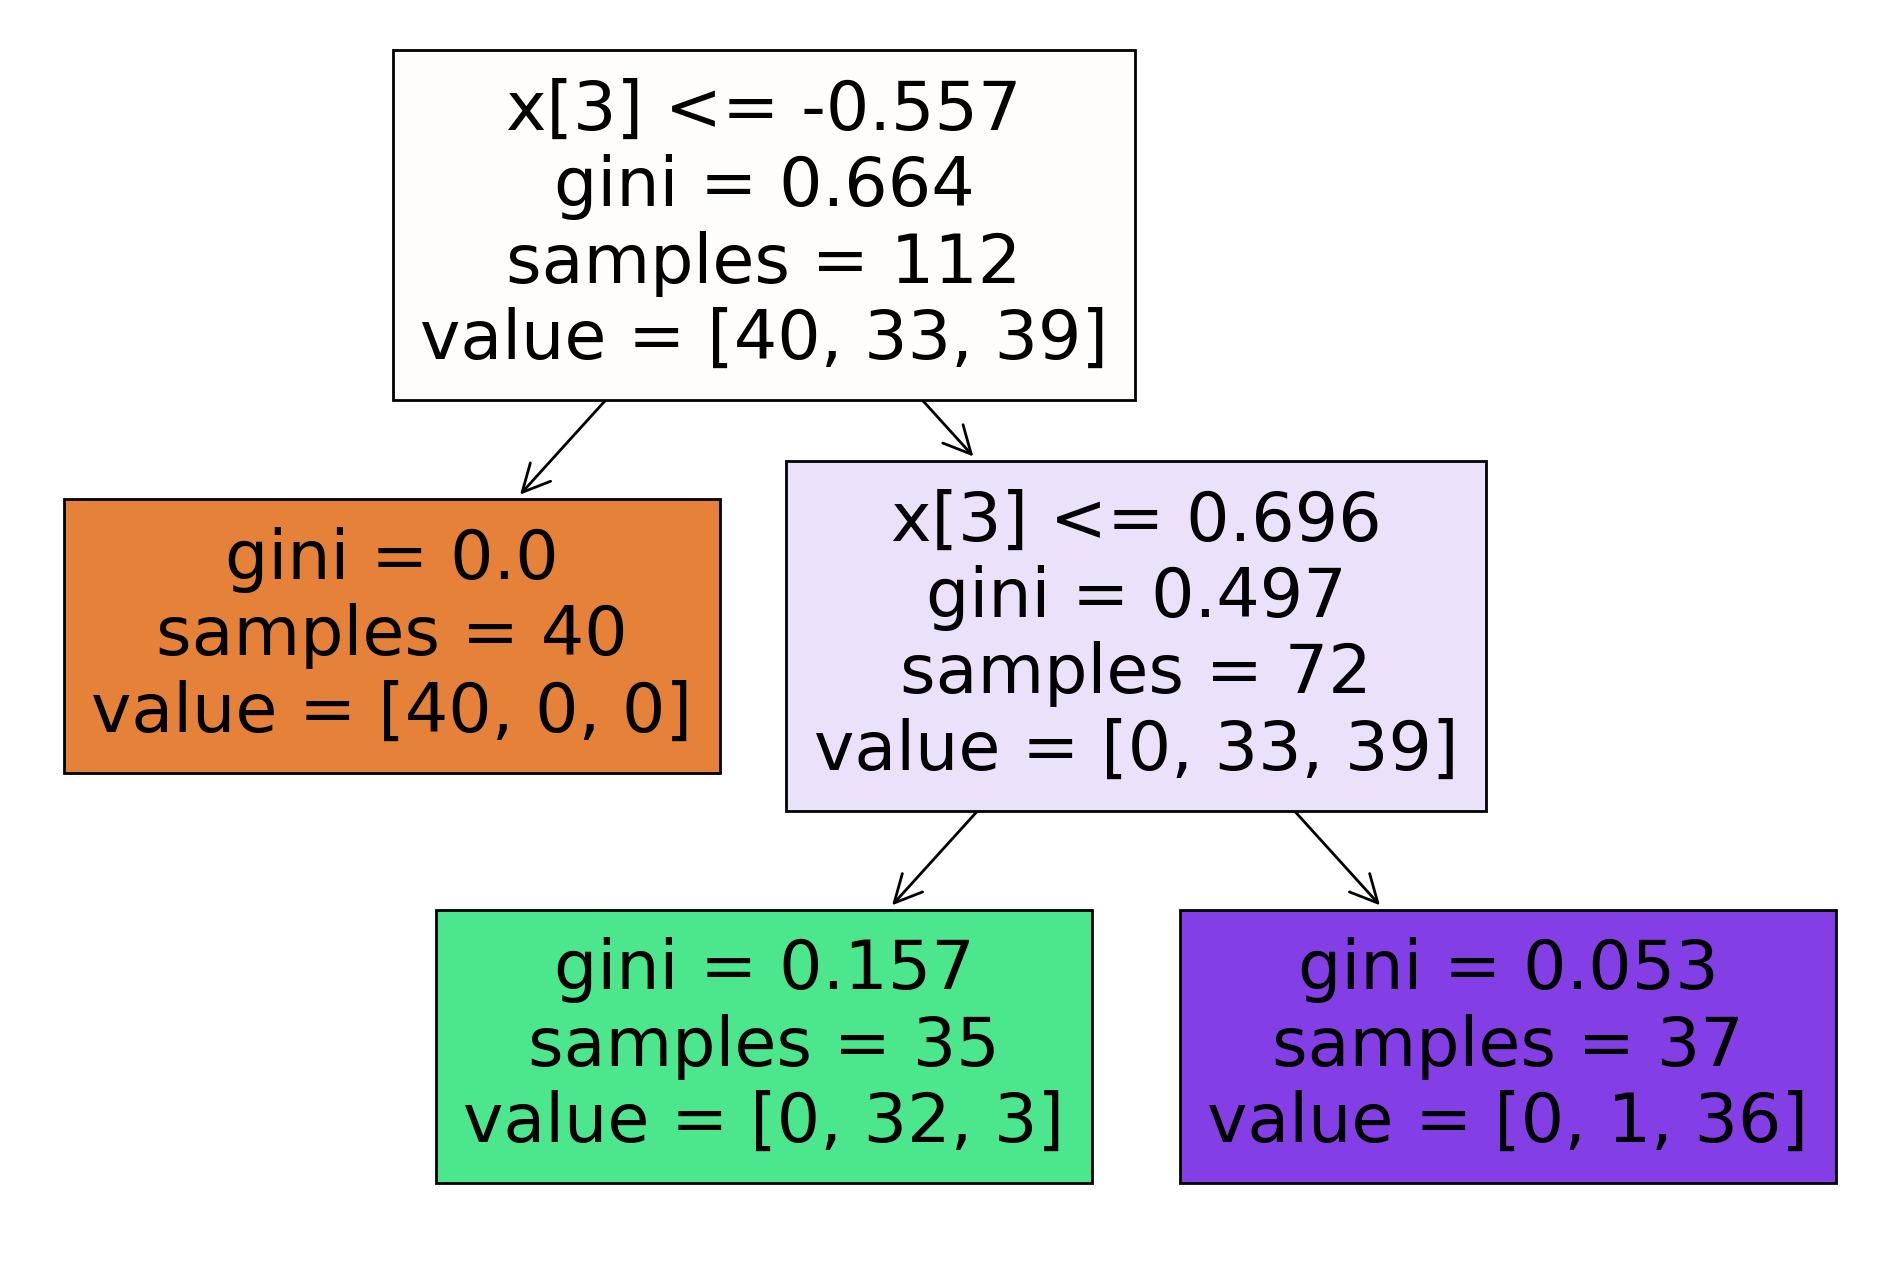

In [57]:
plt.figure(figsize=(12,8),dpi=200)
plot_tree(d_model,filled=True)